In [47]:
import csv
import pandas as pd
import numpy as np
import os 
import pathlib
import xml.etree.ElementTree as ET
import xarray as xr
import codecs
import datetime

In [33]:
#先从海浪数据中提取出经纬度，时间，风，海浪高度
# 解析单个文件，并存于字典内
def batch_readxmlfiles(read_file:str):
    parser = ET.XMLParser(encoding="iso-8859-5")
    #print(read_file)
    Tree = ET.parse(read_file,parser=parser)
    header=[]
    row=[]
    root = Tree.getroot()
    #print(root.tag)
    dict_temp={}
    time_node = root.find('./BuoyageRpt/DateTime')
    #print(time_node.tag)
    dict_temp["time"] = time_node.get("DT")
    location_node = root.find('./BuoyageRpt/BuoyInfo/Location')
    longitude_temp = location_node.get("longitude").replace("Ёф", "").replace("E", "")
    min_temp = longitude_temp.split("Ёу")
    longitude = float(min_temp[0]) + float(min_temp[1])/60
    dict_temp["longitude"] = longitude
    latitude_temp = location_node.get("latitude").replace("Ёф", "").replace("N", "")
    min_temp = latitude_temp.split("Ёу")
    latitude = float(min_temp[0]) + float(min_temp[1])/60
    dict_temp["latitude"] = latitude
    #print(dict_temp["longitude"])
    #print(dict_temp["latitude"])
    BD_node = root.find('./BuoyageRpt/HugeBuoyData/BuoyData')
    dict_temp["WS"] = BD_node.get("WS")
    dict_temp["YBG"] = BD_node.get("YBG") 
    return dict_temp

In [29]:
dict_list = batch_readxmlfiles('2023/01/202301010000MF01001.dat.xml')
print(dict_list)

120.59533333333333
39.50033333333333
{'time': '202301010000', 'longitude': 120.59533333333333, 'latitude': 39.50033333333333, 'WS': '6.8', 'YBG': '1.3'}


In [ ]:
def batch_read_fubs(read_path:str):
    """
        + 25-04-12 
        step1:读取指定目录下的所有文件
        step2:读取对应的经纬度
        step3:将经纬度 度分秒的形式 -> 小数
        step4:将每一个时刻的xml文件对应的位置创建为一个字典或对象，生成一整年的数组
    """
    pass

In [30]:
def batch_path_files_reader(read_path:str):
    path=pathlib.Path(read_path)
    files=path.rglob('*.xml')
    dict_list=[]
    for temp_file in files:
        # print(temp_file)
        temp_file_path=str(temp_file)
        temp_dict=batch_readxmlfiles(temp_file_path)
        dict_list.append(temp_dict)
    return dict_list

In [35]:
#read_path_alls=[r'./fub/MF01001', r'./fub/MF01002',r'./fub/MF02001']
read_path_alls=[r'./fub/MF01001']
print(read_path_alls)

['./fub/MF01001']


In [36]:
#递归遍历文件夹，找出指定文件，调用函数解析
    
    

def batch_path_reader(dirdeep,read_path_alls):
    read_path_alls_path=pathlib.Path(read_path_alls)
    read_paths=read_path_alls_path.iterdir()

    for read_path in read_paths:

        if os.path.isdir(read_path):
            dirdeep=dirdeep+1
            if dirdeep == 1:
                if os.path.exists(str(read_path)+"_local.csv"):
                    os.remove(str(read_path)+"_local.csv")
                    print(f"文件已成功删除。")
                batch_path_reader(dirdeep,read_path)

            if dirdeep == 2:
                dict_list=[]               
                print(dirdeep)
                print("here2")
                print(read_path)
                csvfile_name=os.path.split(read_path)[0]+"_"+os.path.split(read_path)[1]
                print(csvfile_name)
                dict_list=batch_path_files_reader(read_path)
                df = pd.DataFrame(dict_list)
                df.fillna(0)
                df.set_index('time',inplace=True)
                #df.to_csv(csvfile_name+".csv", index=True, encoding='utf-8')
                print(df.head(5))
                try:
                    with open(os.path.split(read_path)[0]+"_local.csv", 'a', newline='') as file:
                        df.to_csv(os.path.split(read_path)[0]+"_local.csv", mode='a', header=not file.tell())
                        print(f"数据已成功追加")
                except FileNotFoundError:
                    # 如果文件不存在，则创建新文件并写入数据，同时写入表头
                    df.to_csv(os.path.split(read_path)[0]+"_local.csv")
                    print(f"文件 不存在，已创建并写入数据")
                except Exception as e:
                    print(f"发生错误: {e}")    
            dirdeep=dirdeep-1

        else:
            continue

            
            
for read_path_all in read_path_alls:
    dirdeep=0
    df_year = pd.DataFrame()
    print(read_path_all)
    batch_path_reader(dirdeep,read_path_all)

./fub/MF01001
文件已成功删除。
2
here2
fub\MF01001\2023\01
fub\MF01001\2023_01
               longitude   latitude   WS  YBG
time                                         
202301010000  120.595333  39.500333  6.8  1.3
202301010100  120.595333  39.500333  5.7  1.2
202301010200  120.595333  39.500333  4.6  1.1
202301010300  120.595333  39.500333  4.9  0.8
202301010400  120.595500  39.500667  4.4  0.8
数据已成功追加
2
here2
fub\MF01001\2023\02
fub\MF01001\2023_02
              longitude   latitude    WS  YBG
time                                         
202302010000   120.5955  39.500833   7.4  0.5
202302010100   120.5955  39.500833   7.9  0.6
202302010200   120.5955  39.500833   7.0  0.7
202302010300   120.5955  39.500667  10.5  0.8
202302010400   120.5955  39.500667  14.5  1.8
数据已成功追加
2
here2
fub\MF01001\2023\03
fub\MF01001\2023_03
               longitude   latitude   WS  YBG
time                                         
202303010000  120.595333  39.500833  4.2  0.3
202303010100  120.595333  39.500833

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

fub\MF01001\2023_local.csv
0       120.595333
1       120.595333
2       120.595333
3       120.595333
4       120.595500
           ...    
8898    120.595000
8899    120.595000
8900    120.595000
8901    120.595000
8902    120.595167
Name: longitude, Length: 8903, dtype: float64


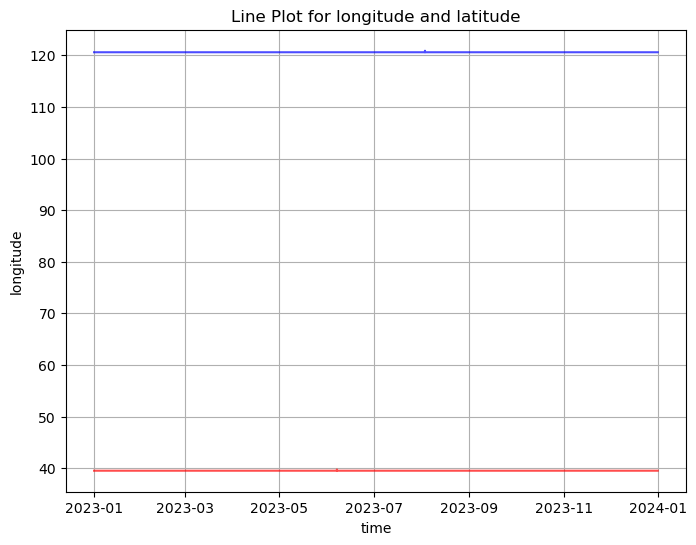

fub\MF01001\2024_local.csv
0       120.595167
1       120.594667
2       120.594667
3       120.595167
4       120.595000
           ...    
8882    120.609667
8883    120.609667
8884    120.609667
8885    120.609667
8886    120.609500
Name: longitude, Length: 8887, dtype: float64


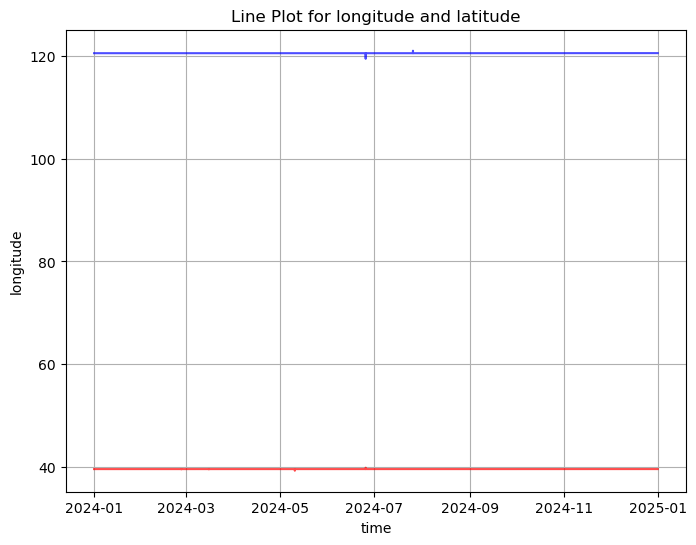

fub\MF01001\2025_local.csv
0       120.609500
1       120.609500
2       120.609500
3       120.609500
4       120.609500
           ...    
1924    120.609333
1925    120.609333
1926    120.609333
1927    120.609167
1928    120.609167
Name: longitude, Length: 1929, dtype: float64


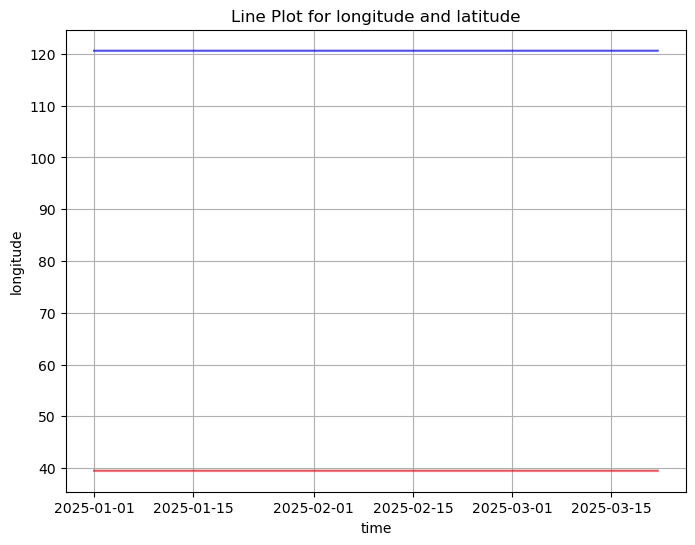

In [ ]:
#根据经纬度画图

#读取文件

# 要读取的 CSV 文件所在目录
csv_directory = r'./fub/MF01001'  


# 读取目录下的所有 CSV 文件
csv_files = pathlib.Path(csv_directory).rglob('*_local.csv')
#df = pd.DataFrame('')
for csv_file in csv_files:
    #if '_' not in str(csv_file):
    print(csv_file)
    csv_data = pd.read_csv(csv_file)
    csv_data['time'] = pd.to_datetime(csv_data['time'],format='%Y%m%d%H%M')
    plt.figure(figsize=(8, 6)) 
    print(csv_data['longitude'])
    # 设定要过滤的两列及其范围
    longitude_lower = 119
    longitude_upper = 122
    latitude_lower = 38
    latitude_upper = 41

    #将不在范围值内的数据用平均值替代
    # 处理 longitude
    longitude_values_within_range = csv_data[(csv_data['longitude'] >= longitude_lower) & (csv_data['longitude'] <= longitude_upper)]['longitude']
    longitude_avg = longitude_values_within_range.mean()
    csv_data['longitude'] = np.where((csv_data['longitude'] < longitude_lower) | (csv_data['longitude'] > longitude_upper), longitude_avg, csv_data['longitude'])

    # 处理 latitude
    latitude_values_within_range = csv_data[(csv_data['latitude'] >= latitude_lower) & (csv_data['latitude'] <= latitude_upper)]['latitude']
    latitude_avg = latitude_values_within_range.mean()
    csv_data['latitude'] = np.where((csv_data['latitude'] < latitude_lower) | (csv_data['latitude'] > latitude_upper), latitude_avg, csv_data['latitude'])

    # 根据布尔索引过滤 DataFrame
    #filtered_df = csv_data[filter_condition]
    #plt.ylim(30, csv_data['longitude'].max)
    #plt.plot(x='time', y='longitude', data=csv_data, color='blue', label='Line Plot')
    #plt.plot(x='time', y='latitude', data=csv_data, color='red', label='Line Plot')
    sns.lineplot(x='time', y='longitude', data=csv_data, color='blue', alpha=0.7)
    sns.lineplot(x='time', y='latitude', data=csv_data, color='red', alpha=0.7)
    # 添加标题和标签
    plt.title('Line Plot for longitude and latitude')


    plt.grid(True)
    plt.show()
        

In [145]:
#file_path = r'Z:\风场数据\GRAPES\2024\GRAPES_2024010100_240h_UV.nc'
file_path = r'Z:/风场数据/GRAPES/2024/GRAPES_2024010100_240h_UV.nc'

def batch_readncfiles(read_file:str):
    print(read_file)
    ds = xr.open_dataset(read_file)
    file_name = os.path.split(read_file)[1]
    time = str(file_name).split('_')[1]
    #print(time)
    #file_name = os.path.split(read_file)[0]+"_"+os.path.split(read_path)[1]
    # 查看数据集的基本信息
    #print("数据集基本信息：")
    #ds.info()


    
    #lat_coords = ds['latitude'].values
    #print(lat_coords)
    #long_coords = ds['longitude'].values
    #print(long_coords)
    

#指定经纬坐标，取得时间维度的数据
    time_ds =  ds.sel(longitude='120',latitude='39', method='nearest') 
    
    # 获取剩余维度（这里是 time）和变量值
    time_dim = list(time_ds.dims.keys())[0] 
    #print(time_dim)
    remaining_dim_values = time_ds[time_dim].values
    UGRD_values = time_ds['UGRD_10maboveground'].values
    VGRD_values = time_ds['VGRD_10maboveground'].values

   # time=pd.to_datetime(remaining_dim_values)
    #formattime=time.strftime('%Y%m%d%H')
    #print(formattime)

    # 只取前12个值
    UV_values=list(zip(UGRD_values,VGRD_values))
    #print(UV_values)
    #print(len(UV_values))
    # df = pd.DataFrame({
    #     'timepoint': time,
    #     'pretime': pd.to_datetime(remaining_dim_values).strftime('%Y%m%d%H'),
    #     'UV_values': UV_values[:12]
    # #    'VGRD_10maboveground': VGRD_values[:12]
    # })
    
    # 创建 DataFrame
    data = {
        'time': time
    }

    # 添加 12 列数据
    column_names = [f'pertime_{i + 1}' for i in range(12)]
    for col_name, value in zip(column_names, UV_values):
        data[col_name] = [value]


    df = pd.DataFrame(data)
    #print(df)   
    return df
    
    #ds_nc=df.set_index('timepoint').to_xarray()
    #ds_nc.info
    
    #return ds_nc
       
    #print(time_uv)
        
        
    #for var_name, var in ds.data_vars.items():
        #print(f"变量名: {var_name}")
        #print("变量值:")
        #print(var.values)
        #print("-" * 50)

    #type(ds)
    # 读取特定变量的数据
    #var = ds['dimensions']
    #print("\n特定变量的数据内容：")
    #print(var.values)

    # 关闭数据集
    #ds.close()

    
batch_readncfiles(file_path)

Z:/风场数据/GRAPES/2024/GRAPES_2024010100_240h_UV.nc


FileNotFoundError: [Errno 2] No such file or directory: 'Z:\\风场数据\\GRAPES\\2024\\GRAPES_2024010100_240h_UV.nc'

In [64]:
ds1=xr.open_dataset('GRAPES_2024010100_240h_UV.nc')
ds2=xr.open_dataset('GRAPES_2024010112_240h_UV.nc')
# 指定经纬度
selected_latitude = 39
selected_longitude = 120

# 从 ds1 中提取指定经纬度下时间维度的数据
subset_ds1 = ds1.sel(latitude=selected_latitude, longitude=selected_longitude, method='nearest')

# 从 ds2 中提取指定经纬度下时间维度的数据
subset_ds2 = ds2.sel(latitude=selected_latitude, longitude=selected_longitude, method='nearest')

# 合并两个子数据集
combined_ds = xr.merge([subset_ds1, subset_ds2],compat='override')

print(combined_ds)

<xarray.Dataset> Size: 1kB
Dimensions:              (time: 65)
Coordinates:
  * time                 (time) datetime64[ns] 520B 2024-01-01 ... 2024-01-11...
    latitude             float64 8B 39.06
    longitude            float64 8B 120.0
Data variables:
    UGRD_10maboveground  (time) float32 260B 2.2 4.761 6.346 ... 5.796 nan nan
    VGRD_10maboveground  (time) float32 260B -1.037 1.506 2.873 ... nan nan
Attributes:
    history:                    Mon Jan  1 19:38:49 2024: ncks -A -v UGRD_10m...
    history_of_appended_files:  Mon Jan  1 19:38:49 2024: Appended file GRAPE...
    NCO:                        netCDF Operators version 4.7.5 (Homepage = ht...


In [140]:
#读取当前文件夹nc文件

path= "风场数据/GRAPES/2024"
df_nc = None
full_path = r"Z:\\" + path
nc_path=pathlib.Path(full_path)
#full_path = r"C:\" + path
for file in nc_path.iterdir():
#    file_path_str =str(file)
    
#for file in 'GRAPES_2024010100_240h_UV.nc','GRAPES_2024010112_240h_UV.nc':
    if file.is_file():
        file_path_str:str =str(file)
        print(file_path_str)
        temp_df=batch_readncfiles(file_path_str)
        print(file)
        if 'df_nc' != None:
            combined_df=pd.concat([df_nc, temp_df], ignore_index=True)
            df_nc=combined_df
        else:
            df_nc=temp_df

# df_nc.to_csv("nc_data_2024.csv")
#print(df_nc)


Z:\风场数据\GRAPES\2024\GRAPES_2024010100_240h_UV.nc
Z:\风场数据\GRAPES\2024\GRAPES_2024010100_240h_UV.nc


FileNotFoundError: [Errno 2] No such file or directory: 'Z:\\风场数据\\GRAPES\\2024\\GRAPES_2024010100_240h_UV.nc'

In [22]:
variable_names = ds.keys()
print(variable_names)

NameError: name 'ds' is not defined

In [ ]:

    # 读取特定变量的数据
    var = ds['your_variable_name']
    print("\n特定变量的数据内容：")
    #print(var.values)

    # 关闭数据集
    ds.close()
    
    
batch_readfiles(file_path)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 生成示例数据
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 数据标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 构建四层神经网络模型
model = models.Sequential([
    # 输入层到第一个隐藏层
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    # 第一个隐藏层
    layers.Dense(32, activation='relu'),
    # 第二个隐藏层
    layers.Dense(16, activation='relu'),
    # 输出层，使用 sigmoid 激活函数进行二分类
    layers.Dense(1, activation='sigmoid')
])

# 编译模型
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 打印模型结构
model.summary()

# 训练模型
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 评估模型
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# 定义一个简单的神经网络
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(10, 20)
        self.fc2 = nn.Linear(20, 1)

    def forward(self, x):
        # 中间层输出
        middle_output = self.fc1(x)
        out = self.fc2(middle_output)
        return middle_output, out

# 创建模型实例
model = SimpleNet()

# 定义优化器和损失函数
optimizer = optim.Adam(model.parameters(), lr=0.001)
mse_loss = nn.MSELoss()

# 模拟输入数据和中间层标准值
input_data = torch.randn(32, 10)
middle_target = torch.randn(32, 20)
target = torch.randn(32, 1)

# 训练循环
num_epochs = 10
for epoch in range(num_epochs):
    optimizer.zero_grad()
    # 前向传播
    middle_output, output = model(input_data)
    # 计算中间层损失
    middle_loss = mse_loss(middle_output, middle_target)
    # 计算最终输出损失
    final_loss = mse_loss(output, target)
    # 总损失为中间层损失和最终输出损失之和
    total_loss = middle_loss + final_loss
    # 反向传播和优化
    total_loss.backward()
    optimizer.step()
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss.item()}')

In [9]:
#定义读取单个文件方法
# 解析单个文件，并存于字典内
def batch_readfiles(read_file:str):
    parser = ET.XMLParser(encoding="iso-8859-5")
    #print(read_file)
    Tree = ET.parse(read_file,parser=parser)
    header=[]
    row=[]
    root = Tree.getroot()
    #print(root.tag)
    dict_temp={}
    time_node = root.find('./BuoyageRpt/DateTime')
    #print(time_node.tag)
    dict_temp["time"] = time_node.get("DT")
    BD_node = root.find('./BuoyageRpt/HugeBuoyData/BuoyData')
    keys=BD_node.keys()
    for key in keys:
        temp_val=BD_node.get(key)
        dict_temp[key]=temp_val
    return dict_temp

def batch_path_files_reader(read_path:str):
    path=pathlib.Path(read_path)
    files=path.rglob('*.xml')
    dict_list=[]
    for temp_file in files:
        # print(temp_file)
        temp_file_path=str(temp_file)
        temp_dict=batch_readfiles(temp_file_path)
        dict_list.append(temp_dict)
    return dict_list

In [ ]:
#读取风场数据
